In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import log10, floor

data1 = pd.read_csv('/media/home/thomas/thomas_files/rl_agents/plots/default_3_rew.csv')
len1 = np.count_nonzero([data1.loc[:,'Step'] <= 3000000])

data1_2 = pd.read_csv('/media/home/thomas/thomas_files/rl_agents/plots/deafult_3_2.csv')
len1_2 = np.count_nonzero([data1_2.loc[:,'Step'] <= 3000000])

data1_3 = pd.read_csv('/media/home/thomas/thomas_files/rl_agents/plots/default_3_stack.csv')
len1_3 = np.count_nonzero([data1_3.loc[:,'Step'] <= 3000000])

data2 = pd.read_csv('/media/home/thomas/thomas_files/rl_agents/plots/SA_3_rew.csv')
len2 = np.count_nonzero([data2.loc[:,'Step'] <= 3000000])

data2_2 = pd.read_csv('/media/home/thomas/thomas_files/rl_agents/plots/SA_3_short.csv')
len2_2 = np.count_nonzero([data2.loc[:,'Step'] <= 3000000])



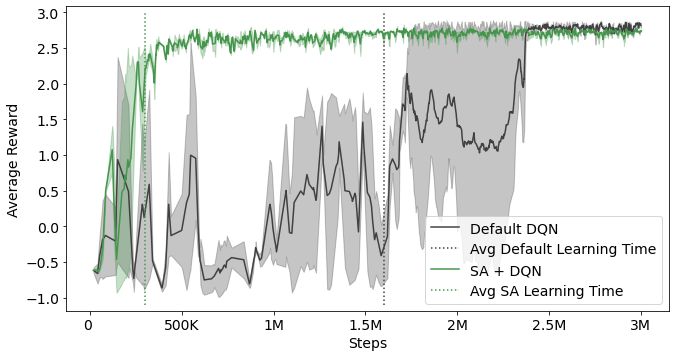

In [7]:
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

# Interpolate default DQN runs and compute mean and std
interp1 = np.interp(data1.loc[:len1,'Step'], data1_2.loc[:len1_2,'Step'], data1_2.loc[:len1_2,'Value'])
mean1 = np.mean([data1.loc[:len1,'Value'], interp1], axis=0)
std1 = np.std([data1.loc[:len1,'Value'], interp1], axis=0)

# Interpolate SA+DQN runs and compute mean and std
interp2 = np.interp(data2.loc[:len2,'Step'], data2_2.loc[:len2_2,'Step'], data2_2.loc[:len2_2,'Value'])
mean2 = np.mean([data2.loc[:len2,'Value'], interp2], axis=0)
std2 = np.std([data2.loc[:len2,'Value'], interp2], axis=0)


# Plot results
fig, ax = plt.subplots()

# ax.plot(data1.loc[:len1,'Step'], data1.loc[:len1, 'Value'], label='Default DQN', color='#414141')
ax.plot(data1.loc[:len1,'Step'], mean1, label='Default DQN', color='#414141')
ax.fill_between(data1.loc[:len1,'Step'], mean1-std1, mean1+std1, color='#414141', alpha=0.3)
plt.axvline(x=1600000, label='Avg Default Learning Time', ls=':', ymin=0.02, ymax=0.98, color='#414141')

# ax.plot(data2.loc[:len2,'Step'], data2.loc[:len2, 'Value'], label='SA + DQN', color='#45954c')
ax.plot(data2.loc[:len2,'Step'], mean2, label='SA + DQN', color='#45954c')
ax.fill_between(data2.loc[:len2,'Step'], mean2-std2, mean2+std2, color='#45954c', alpha=0.3)
plt.axvline(x=300000, label='Avg SA Learning Time', ls=':', ymin=0.02, ymax=0.98, color='#45954c')

ax.set(xlabel='Steps', ylabel='Average Reward')
ax.legend()
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.rcParams['figure.figsize'] = [10.8, 5.6]
plt.rcParams.update({'font.size': 14})
plt.show()